In [1]:
#!pip install requests
#!pip install citipy

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

today = date.today()

In [3]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

650

In [5]:
#Create a dataframe with the generated cities
cities_df = pd.DataFrame(
    {'City': cities})
cities_df.head()

,City
0,itaberai
1,puerto ayora
2,borba
3,phan thiet
4,iqaluit


In [6]:
# set up additional columns to hold information
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Max Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""

cities_df.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,itaberai,,,,,,,,
1,puerto ayora,,,,,,,,
2,borba,,,,,,,,
3,phan thiet,,,,,,,,
4,iqaluit,,,,,,,,


In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [8]:
#check to see how json is formatted so we can pull correct information
response = requests.get(query_url + "hervey bay").json()
response

{'coord': {'lon': 152.8535, 'lat': -25.2986},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 83.03,
  'feels_like': 92.35,
  'temp_min': 82.51,
  'temp_max': 83.03,
  'pressure': 1014,
  'humidity': 83,
  'sea_level': 1014,
  'grnd_level': 1012},
 'visibility': 10000,
 'wind': {'speed': 20.83, 'deg': 0, 'gust': 25.28},
 'clouds': {'all': 3},
 'dt': 1634962556,
 'sys': {'type': 2,
  'id': 2010900,
  'country': 'AU',
  'sunrise': 1634929639,
  'sunset': 1634975898},
 'timezone': 36000,
 'id': 2146219,
 'name': 'Hervey Bay',
 'cod': 200}

In [9]:
# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():
    # get city from the dataframe
    city = row['City']
    # assemble url and make API request
    print(f"Retrieving Results for City {index}: {city}.")
    response = requests.get(query_url + city).json()
    try:        
        cities_df.loc[index, 'Latitude'] = response['coord']['lat']
        cities_df.loc[index, 'Longitude'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temperature (F)'] = response['main']['temp_max']
        cities_df.loc[index, 'Humidity (%)'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed (mph)'] = response['wind']['speed']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")

Retrieving Results for City 0: itaberai.
Retrieving Results for City 1: puerto ayora.
Retrieving Results for City 2: borba.
Retrieving Results for City 3: phan thiet.
Retrieving Results for City 4: iqaluit.
Retrieving Results for City 5: punta arenas.
Retrieving Results for City 6: port hedland.
Retrieving Results for City 7: saint-philippe.
Retrieving Results for City 8: hobart.
Retrieving Results for City 9: whitianga.
Retrieving Results for City 10: katoro.
Retrieving Results for City 11: rodeo.
Retrieving Results for City 12: busselton.
Retrieving Results for City 13: carnarvon.
Retrieving Results for City 14: deputatskiy.
Retrieving Results for City 15: katsuura.
Retrieving Results for City 16: constitucion.
Retrieving Results for City 17: belushya guba.
City not found. Skipping...
Retrieving Results for City 18: esperance.
Retrieving Results for City 19: denham springs.
Retrieving Results for City 20: nyurba.
Retrieving Results for City 21: shimoda.
Retrieving Results for City 22

Retrieving Results for City 181: cabo san lucas.
Retrieving Results for City 182: shelburne.
Retrieving Results for City 183: inuvik.
Retrieving Results for City 184: paamiut.
Retrieving Results for City 185: aleksandrov gay.
Retrieving Results for City 186: asau.
Retrieving Results for City 187: alofi.
Retrieving Results for City 188: thompson.
Retrieving Results for City 189: catanduva.
Retrieving Results for City 190: aljezur.
Retrieving Results for City 191: awbari.
Retrieving Results for City 192: vestmannaeyjar.
Retrieving Results for City 193: tevaitoa.
Retrieving Results for City 194: nizhneyansk.
City not found. Skipping...
Retrieving Results for City 195: salalah.
Retrieving Results for City 196: marawi.
Retrieving Results for City 197: bredasdorp.
Retrieving Results for City 198: gariaband.
Retrieving Results for City 199: tomatlan.
Retrieving Results for City 200: severo-kurilsk.
Retrieving Results for City 201: abashiri.
Retrieving Results for City 202: volno-nadezhdinskoy

Retrieving Results for City 361: sentyabrskiy.
City not found. Skipping...
Retrieving Results for City 362: lebu.
Retrieving Results for City 363: carnduff.
Retrieving Results for City 364: ilembula.
Retrieving Results for City 365: meulaboh.
Retrieving Results for City 366: viligili.
City not found. Skipping...
Retrieving Results for City 367: sibolga.
Retrieving Results for City 368: taunton.
Retrieving Results for City 369: abu zabad.
Retrieving Results for City 370: katobu.
Retrieving Results for City 371: xining.
Retrieving Results for City 372: aksu.
Retrieving Results for City 373: vieques.
Retrieving Results for City 374: dolbeau.
City not found. Skipping...
Retrieving Results for City 375: skjervoy.
Retrieving Results for City 376: tabuk.
Retrieving Results for City 377: brownsville.
Retrieving Results for City 378: marrakesh.
Retrieving Results for City 379: lipari.
Retrieving Results for City 380: abu dhabi.
Retrieving Results for City 381: puerto narino.
Retrieving Results 

Retrieving Results for City 542: carlyle.
Retrieving Results for City 543: chicama.
Retrieving Results for City 544: changji.
Retrieving Results for City 545: yueyang.
Retrieving Results for City 546: leh.
Retrieving Results for City 547: mattru.
Retrieving Results for City 548: khaniotis.
Retrieving Results for City 549: belyy yar.
Retrieving Results for City 550: egvekinot.
Retrieving Results for City 551: mutoko.
Retrieving Results for City 552: lasa.
Retrieving Results for City 553: dera bugti.
Retrieving Results for City 554: ayan.
Retrieving Results for City 555: quang ngai.
Retrieving Results for City 556: hede.
Retrieving Results for City 557: takoradi.
Retrieving Results for City 558: synya.
Retrieving Results for City 559: komsomolskiy.
Retrieving Results for City 560: kiunga.
Retrieving Results for City 561: chernyshevskiy.
Retrieving Results for City 562: ginir.
Retrieving Results for City 563: karratha.
Retrieving Results for City 564: seoul.
Retrieving Results for City 56

In [10]:
#print dataframe
cities_df.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,itaberai,-16.0203,-49.8103,71.31,74,12,4,BR,1634962556
1,puerto ayora,-0.7393,-90.3518,69.96,86,37,7,EC,1634962556
2,borba,-4.3878,-59.5939,76.84,80,97,2.42,BR,1634962557
3,phan thiet,10.9333,108.1,86.49,65,91,2.75,VN,1634962505
4,iqaluit,63.7506,-68.5145,26.33,86,90,8.01,CA,1634962557


In [44]:
#get rid of extra rows that don't have data
cities_df = cities_df[cities_df['Latitude'] != ""]

cities_df = cities_df.replace('', np.nan)
cities_df = cities_df.dropna()

cities_df.head()

,City,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,itaberai,-16.0203,-49.8103,71.31,74,12,4.00,BR,1634962556
1,puerto ayora,-0.7393,-90.3518,69.96,86,37,7.00,EC,1634962556
2,borba,-4.3878,-59.5939,76.84,80,97,2.42,BR,1634962557
3,phan thiet,10.9333,108.1000,86.49,65,91,2.75,VN,1634962505
4,iqaluit,63.7506,-68.5145,26.33,86,90,8.01,CA,1634962557


In [45]:
#export dataframe to csv
pd.DataFrame.to_csv(cities_df, 'cities.csv')

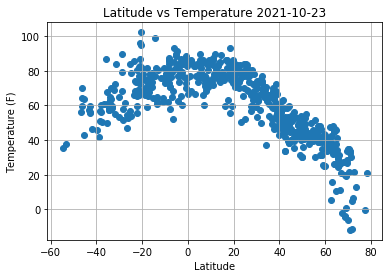

In [46]:
#Latitude vs Temperature
plt.scatter(cities_df['Latitude'], cities_df['Max Temperature (F)'])
plt.title(f"Latitude vs Temperature {today}")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig("Images/lattemp.png")
plt.grid(True)

This plot shows how the temperature rises as the cities get closer to the equator, which has a latitude of zero. The temperature farther away from zero are lower/colder.

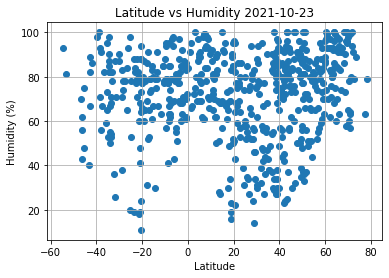

In [48]:
#Latitude vs Humidity
plt.scatter(cities_df['Latitude'], cities_df['Humidity (%)'])
plt.title(f"Latitude vs Humidity {today}")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("Images/lathumid.png")
plt.grid(True)

It seems that the humidity in this sample set of cities is mostly pretty humid. The arid(not humid) places seem to mostly be around the range of 20 to 40 on both side of the equator. I would hazzard a guess that that is where most deserts are located.

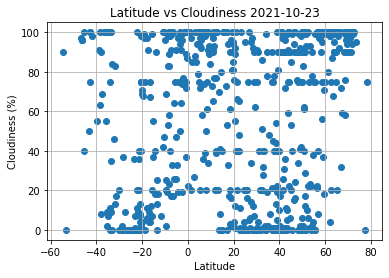

In [49]:
#Latitude vs Cloudiness
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness (%)'])
plt.title(f"Latitude vs Cloudiness {today}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("Images/latcloud.png")
plt.grid(True)

The cloudiness seems to follow a similar pattern to the humidity in the 20 to 40 range on either side of the equator. In those areas there is a higher concerntration of no clouds, and everwhere else it seems to tend towards 100% cloudiness.

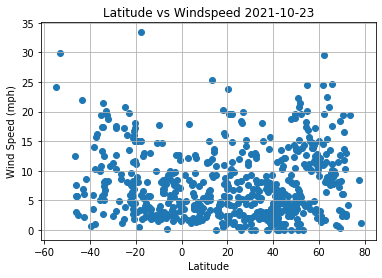

In [50]:
#Latitude vs Cloudiness
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed (mph)'])
plt.title(f"Latitude vs Windspeed {today}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Images/latwind.png")
plt.grid(True)

This does not seem to show any major trends by latitude. It seems that the wind speed in the sample set is pretty low across the board.

In [52]:
#split the data set into north and south hemispheres
ncities_df = cities_df.loc[cities_df['Latitude'] > 0]
scities_df = cities_df.loc[cities_df['Latitude'] < 0]

Text(0, 0.5, 'Max Temperature (F)')

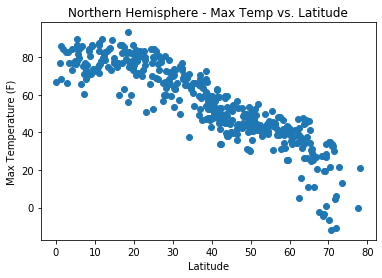

In [53]:
#Northern Hemisphere - Temperature (F) vs. Latitude
#make scatter plot
plt.scatter(ncities_df['Latitude'], ncities_df['Max Temperature (F)'], marker="o")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

The r-value is: -0.8915915087641445


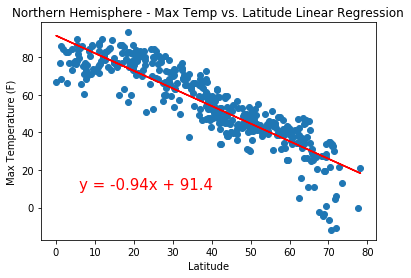

In [65]:
#linear regression
x_values = ncities_df['Latitude']
y_values = ncities_df['Max Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/nlattemp.png")
plt.show()

The r-value is: 0.6298196458552928


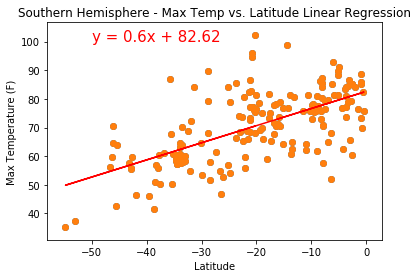

In [66]:
#Southern Hemisphere - Temperature (F) vs. Latitude
#make scatter plot
plt.scatter(scities_df['Latitude'], scities_df['Max Temperature (F)'], marker="o")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

x_values = scities_df['Latitude']
y_values = scities_df['Max Temperature (F)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,100),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/slattemp.png")
plt.show()

This cuts the original graph of max temp in half at the equator. As the cities move farther, they tend to be colder. This means that the regression of the northern hemisphere has a negative slope and the southern has a positive.

The r-value is: 0.15083914014059668


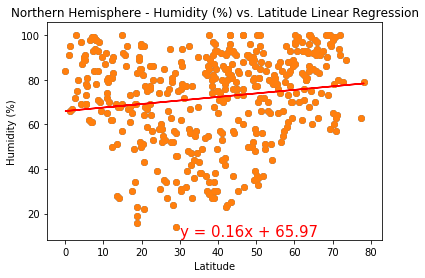

In [68]:
#Northern Hemisphere - Humidity (%) vs. Latitude
#make scatter plot
plt.scatter(ncities_df['Latitude'], ncities_df['Humidity (%)'], marker="o")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

x_values = ncities_df['Latitude']
y_values = ncities_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/nlathumid.png")
plt.show()

The r-value is: 0.06534692787572079


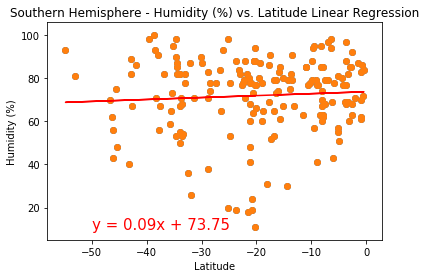

In [70]:
#Southern Hemisphere - Humidity (%) vs. Latitude
plt.scatter(scities_df['Latitude'], scities_df['Humidity (%)'], marker="o")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

x_values = scities_df['Latitude']
y_values = scities_df['Humidity (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/slathumid.png")
plt.show()

Both of these graphs have a similar shape. The more arid values are in a certain range from the equator. The values at the poles and the equator are pretty much consistantly pretty humid.

The r-value is: 0.1452986388936787


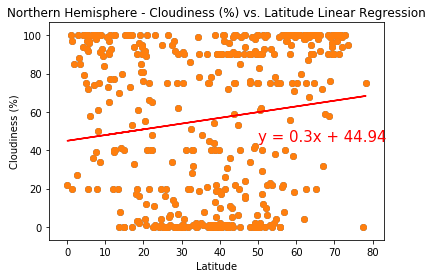

In [72]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
plt.scatter(ncities_df['Latitude'], ncities_df['Cloudiness (%)'], marker="o")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

x_values = ncities_df['Latitude']
y_values = ncities_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,45),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/nlatcloud.png")
plt.show()

The r-value is: 0.08968628486543839


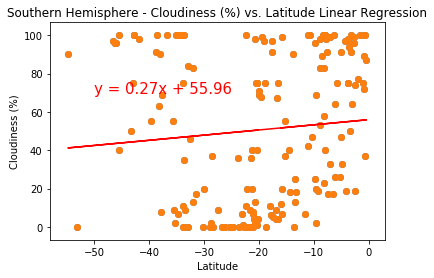

In [75]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
#make scatter plot
plt.scatter(scities_df['Latitude'], scities_df['Cloudiness (%)'], marker="o")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

x_values = scities_df['Latitude']
y_values = scities_df['Cloudiness (%)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,70),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/slatcloud.png")
plt.show()

You can see more clearly that in the range 20 to 40 range has a different behavior. I am not sure if there is necessarily reliant on the distance from the equator. All the best fit lines seem to be pretty flat.

The r-value is: 0.2270909171110324


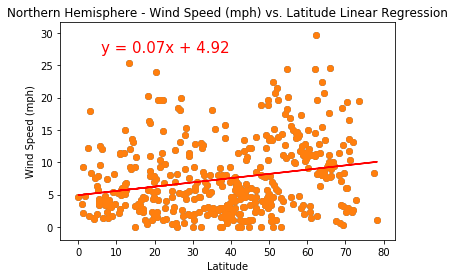

In [78]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
#make scatter plot
plt.scatter(ncities_df['Latitude'], ncities_df['Wind Speed (mph)'], marker="o")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

x_values = ncities_df['Latitude']
y_values = ncities_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,27),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/nlatwind.png")
plt.show()

The r-value is: -0.313646720868891


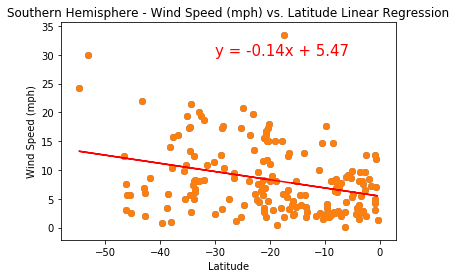

In [79]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
#make scatter plot
plt.scatter(scities_df['Latitude'], scities_df['Wind Speed (mph)'], marker="o")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

x_values = scities_df['Latitude']
y_values = scities_df['Wind Speed (mph)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-value is: {rvalue}")
plt.savefig("Images/slatwind.png")
plt.show()

After running through a different set of cities a few times, it seems that wind speed tends to generally increase as one get farther away from the equator.

##Observations
1. The really arid places seem to only occur at a certain distance from the equator. It would make sense that they account for some of the  places in those latitudes that have no clouds, because there is no water in the air.
2. There seem to be some weird outliers in wind speed despite running the data multiple times. Was that city just having a really windy day, and if thats true, how accurate is the data if we are only pulling current rather than average.
3. The cloudiness data seems to gather around rounded numbers, which makes me wonder how it is reported. Is it a scientific measure that just happens to be rounded or is it a human observation and we like rounder numbers?